# **Tugas Machine Learning – KNN with Library**

**Nama:** Wayan Raditya Putra  
**NRP:** 5054241029  
**Program Studi:** Rekayasa Kecerdasan Artifisial (RKA)  
**Angkatan:** 2024  
**Kelas:** N  
**Mata Kuliah:** Machine Learning  
**Dosen Pembimbing:** Bapak Aldinata & Ibu Dini


## Persiapan Awal

Sebelum memulai proses analisis dan pembangunan model **K-Nearest Neighbors (KNN)**, terlebih dahulu kita perlu melakukan import beberapa library utama yang akan digunakan dalam pengerjaan tugas ini, yaitu:

- **pandas** → digunakan untuk mengelola dan memanipulasi data dalam bentuk tabel (DataFrame).  
- **numpy** → digunakan untuk operasi numerik, terutama array dan perhitungan matematis.  
- **matplotlib.pyplot** → digunakan untuk visualisasi data berupa grafik dasar.  
- **seaborn** → digunakan untuk visualisasi data yang lebih interaktif dan informatif dengan tampilan estetis.  

Library ini akan menjadi fondasi dalam proses **eksplorasi data, visualisasi, hingga implementasi model KNN**.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memuat Dataset Iris

Pada tahap ini, dataset yang digunakan adalah **Iris Dataset**. Dataset ini berisi informasi mengenai tiga jenis bunga *Iris* (Setosa, Versicolor, dan Virginica), dengan empat atribut utama:  

1. **Sepal Length** (panjang sepal)  
2. **Sepal Width** (lebar sepal)  
3. **Petal Length** (panjang petal)  
4. **Petal Width** (lebar petal)  

Proses pertama yang dilakukan adalah membaca dataset dari file `Iris.csv` menggunakan fungsi `pd.read_csv()`. Setelah itu, dataset ditampilkan secara keseluruhan untuk memastikan data berhasil dimuat dengan benar.


In [3]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Informasi Struktur Dataset

Langkah berikutnya adalah menampilkan informasi struktur dari dataset menggunakan fungsi `iris.info()`.  

Tujuannya adalah untuk:  
- Mengetahui jumlah baris dan kolom pada dataset.  
- Melihat tipe data pada setiap kolom.  
- Memastikan apakah terdapat nilai yang hilang (*missing values*) pada dataset.  

Berdasarkan hasil output, dapat disimpulkan bahwa **tidak terdapat data yang hilang** sehingga dataset siap digunakan untuk tahap analisis dan pemodelan lebih lanjut.


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Statistik Deskriptif Dataset

Setelah memastikan tidak ada data yang hilang, tahap selanjutnya adalah menampilkan **statistik deskriptif** dari dataset dengan fungsi `iris.describe()`.  

Informasi yang ditampilkan meliputi:  
- **count** → jumlah data pada setiap kolom numerik.  
- **mean** → nilai rata-rata.  
- **std** → standar deviasi yang menunjukkan sebaran data.  
- **min dan max** → nilai minimum dan maksimum.  
- **25%, 50%, 75%** → nilai kuartil pertama, median, dan kuartil ketiga.  

Statistik ini memberikan gambaran awal mengenai distribusi data pada setiap fitur sebelum dilakukan analisis lebih lanjut.


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Distribusi Label Kelas

Untuk memastikan keseimbangan pada label target, dilakukan pengecekan jumlah data pada setiap kelas menggunakan fungsi `value_counts()`.  

Hasil yang diperoleh menunjukkan bahwa:  
- Setiap spesies bunga *Iris* (**Setosa, Versicolor, dan Virginica**) memiliki jumlah data yang sama.  
- Distribusi label pada dataset **seimbang (balanced labels)**.  

Hal ini penting karena dataset yang seimbang akan mempermudah proses pelatihan model dan mencegah terjadinya bias terhadap salah satu kelas.


In [ ]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Penanganan Peringatan (*Warnings*)

Pada tahap implementasi model Machine Learning, sering kali muncul pesan peringatan (*warnings*) dari library yang digunakan.  
Untuk menjaga tampilan notebook tetap bersih dan fokus pada hasil utama, digunakan perintah:  

```python
import warnings
warnings.filterwarnings('ignore')


In [4]:
import warnings
warnings.filterwarnings('ignore')

## Visualisasi Korelasi Fitur

Untuk memahami hubungan antara fitur dengan label target (*Species*), dilakukan perhitungan **korelasi Pearson**.  
Karena kolom *Species* bertipe kategori, maka label terlebih dahulu di-*encode* menjadi numerik (*Species_encoded*).  

Hasil visualisasi dalam bentuk **heatmap** menunjukkan:  
- Tingkat hubungan (positif atau negatif) antara setiap fitur numerik.  
- Korelasi antara masing-masing fitur dengan target *Species*.  

Analisis ini membantu dalam memahami fitur mana yang paling relevan dalam membedakan kelas pada dataset Iris.  
Kolom *Species* asli tidak dimasukkan ke dalam korelasi agar tidak terjadi duplikasi informasi (misalnya *Species* vs *Species*).


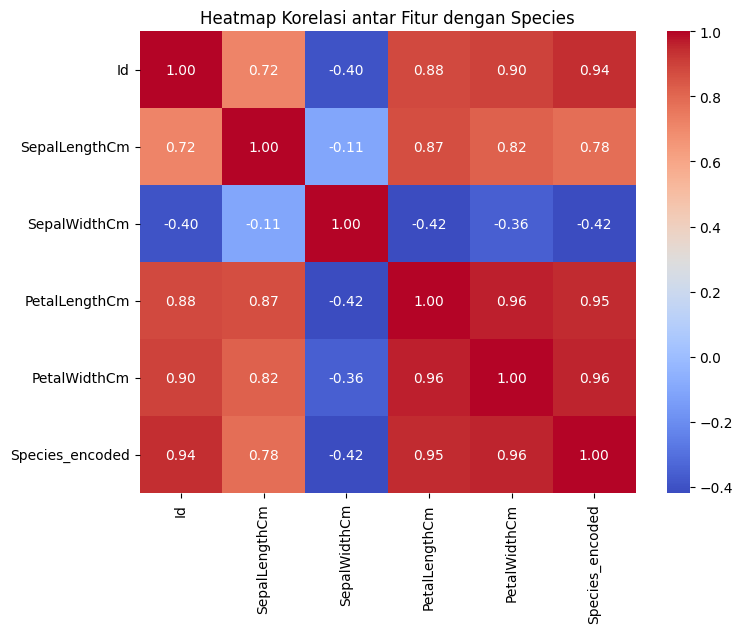

In [ ]:
#Encode target species menjadi numerik agar bisa dihitung korelasi
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris['Species_encoded'] = le.fit_transform(iris['Species'])

#Hitung korelasi hanya antar fitur numerik + target encoded
corr = iris.drop(columns=['Species']).corr()

#Visualisasi heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Heatmap Korelasi antar Fitur dengan Species")
plt.show()


## Encoding Label Target

Karena kolom **Species** masih berupa data kategorikal (*Setosa, Versicolor, Virginica*), maka diperlukan proses **encoding** agar dapat digunakan pada perhitungan numerik maupun pelatihan model Machine Learning.  

Metode yang digunakan adalah **Label Encoding** dengan hasil sebagai berikut:  
- *Iris-setosa* → **0**  
- *Iris-versicolor* → **1**  
- *Iris-virginica* → **2**  

Dengan label target yang sudah dalam bentuk numerik, seluruh fitur pada dataset kini siap digunakan dalam proses pemodelan **K-Nearest Neighbors (KNN)**.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris["Species"] = encoder.fit_transform(iris["Species"])
iris[["Species"]]


'\nIris-setosa        lable 0\nIris-versicolor    lable 1\nIris-virginica     lable 2\n'

## Normalisasi/Scaling Data

Sebelum data digunakan dalam proses pemodelan **K-Nearest Neighbors (KNN)**, diperlukan langkah **scaling** pada fitur numerik.  
Hal ini penting karena KNN sangat bergantung pada perhitungan jarak (*distance metric*).  
Apabila skala antar fitur berbeda jauh, maka fitur dengan nilai lebih besar akan lebih dominan dan dapat menimbulkan bias.  

Fitur yang akan dilakukan scaling adalah:  
- **SepalLengthCm**  
- **SepalWidthCm**  
- **PetalLengthCm**  
- **PetalWidthCm**  

Dengan normalisasi, setiap fitur akan berada pada skala yang sebanding sehingga hasil perhitungan jarak menjadi lebih akurat.


In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Scalling the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in columns_to_scale:
    iris[col] = scaler.fit_transform(iris[col].to_numpy().reshape(-1,1)) 

iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,0
1,2,-1.143017,-0.124958,-1.341272,-1.312977,0
2,3,-1.385353,0.337848,-1.398138,-1.312977,0
3,4,-1.506521,0.106445,-1.284407,-1.312977,0
4,5,-1.021849,1.263460,-1.341272,-1.312977,0


## Mengecek Dimensi Fitur

Untuk memastikan bentuk data pada kolom fitur yang akan digunakan, dilakukan pengecekan menggunakan atribut `.shape`.  
Sebagai contoh, pada kolom **SepalLengthCm**, hasil yang diperoleh menunjukkan jumlah baris data yang tersedia.  

Informasi ini penting untuk memverifikasi bahwa jumlah data konsisten pada setiap fitur sebelum dilakukan proses **scaling** maupun **split data**.


In [12]:
iris['SepalLengthCm'].shape

(150,)

## Transformasi Kolom Menjadi Array 2D

Agar kolom fitur dapat diproses oleh algoritma Machine Learning maupun fungsi **scaling**, data perlu diubah ke dalam bentuk **array 2 dimensi**.  
Hal ini dilakukan dengan perintah:

```python
iris['SepalLengthCm'].to_numpy().reshape(-1,1).shape


In [13]:
iris['SepalLengthCm'].to_numpy().reshape(-1,1).shape

(150, 1)

## Pemahaman Bentuk Array (Shape)

Sebagai ilustrasi dasar, dibuat sebuah array sederhana menggunakan fungsi `np.array([1,2,3])`.  
Ketika diperiksa dengan `.shape`, hasil yang ditampilkan adalah `(3,)`.  

Artinya:  
- Array tersebut memiliki **3 elemen** dalam **1 dimensi**.  
- Bentuk seperti ini sering disebut sebagai *one-dimensional array* (array 1D).  

Hal ini berbeda dengan array hasil transformasi menggunakan `.reshape(-1,1)` yang menghasilkan array 2 dimensi (n baris × 1 kolom).  
Perbedaan representasi ini penting karena sebagian besar algoritma Machine Learning, termasuk **scaler** dan **KNN**, membutuhkan input dalam format array 2D.


In [8]:
np.array(
    [1,2,3]
).shape

(3,)

## Perbedaan Representasi Array 2D

Contoh lain dibuat dengan `np.array([[1],[2],[3]])`.  
Ketika diperiksa dengan `.shape`, hasil yang ditampilkan adalah `(3,1)`.  

Artinya:  
- Array tersebut memiliki **3 baris** dan **1 kolom**.  
- Bentuk ini merupakan representasi **array 2 dimensi**, sehingga sesuai dengan format input yang dibutuhkan oleh banyak algoritma Machine Learning.  

Perbedaan ini menunjukkan pentingnya melakukan transformasi data dari bentuk `(n,)` menjadi `(n,1)` agar data dapat diproses dengan benar, khususnya pada tahap **scaling** maupun pemodelan **KNN**.


In [9]:
np.array(
   [[1],[2],[3]]
).shape


(3, 1)

# Splitting the data

In [10]:
X = iris.drop(columns=["Species", "Id"])
y = iris["Species"]

## Pembagian Data Train dan Test

Setelah semua fitur siap digunakan, dataset perlu dibagi menjadi **data latih (train)** dan **data uji (test)** menggunakan fungsi `train_test_split` dari `sklearn.model_selection`.  

- **X** → berisi fitur (input).  
- **y** → berisi label target (*Species* yang sudah di-encode).  
- **test_size=0.2** → 20% data digunakan sebagai data uji, sedangkan 80% sisanya digunakan sebagai data latih.  
- **random_state=42** → digunakan untuk memastikan hasil pembagian data konsisten dan dapat direproduksi.  

Hasil pembagian ditampilkan dalam bentuk dimensi:  
- **X_train** : fitur data latih  
- **X_test** : fitur data uji  
- **y_train** : label data latih  
- **y_test** : label data uji  

Langkah ini penting agar performa model KNN nantinya dapat dievaluasi secara objektif menggunakan data yang belum pernah dilihat saat pelatihan.


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4)

(30, 4)

(120,)

(30,)

# KNN from sklearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier as KNN

## Pelatihan dan Prediksi Model KNN

Tahap berikutnya adalah membangun model **K-Nearest Neighbors (KNN)** dengan parameter:  
- **n_neighbors = 5** → jumlah tetangga terdekat yang digunakan untuk menentukan kelas.  
- **metric = 'euclidean'** → menggunakan jarak Euclidean sebagai ukuran kedekatan antar data.  

Langkah-langkah yang dilakukan:  
1. **fit (training)** → model dilatih menggunakan data latih (`X_train`, `y_train`).  
2. **predict (testing)** → model yang sudah dilatih digunakan untuk memprediksi kelas dari data uji (`X_test`).  

Output dari proses prediksi berupa array `y_pred`, yang berisi label kelas hasil prediksi model untuk setiap sampel pada data uji.


In [ ]:
model = KNN(n_neighbors=5, metric='euclidean')

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Percobaan Model KNN dengan k = 7

Untuk melihat pengaruh variasi jumlah tetangga terhadap hasil klasifikasi, dilakukan percobaan kedua dengan parameter:  
- **n_neighbors = 7**  
- **metric = 'euclidean'**  

Proses yang dilakukan tetap sama, yaitu:  
1. **Training** → model dilatih menggunakan data latih (`X_train`, `y_train`).  
2. **Testing** → model digunakan untuk memprediksi label dari data uji (`X_test`).  

Hasil prediksi disimpan pada variabel `y_pred`.  
Langkah ini memungkinkan perbandingan performa antara model dengan **k=5** dan **k=7** pada tahap evaluasi berikutnya.


In [ ]:
model = KNN(n_neighbors=7, metric= 'euclidean')

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Perbandingan Hasil Prediksi dengan Nilai Sebenarnya

Untuk mengevaluasi kinerja model secara lebih jelas, hasil prediksi dibandingkan langsung dengan label sebenarnya pada data uji.  
Hal ini dilakukan dengan membentuk sebuah **DataFrame** yang berisi dua kolom:  

- **Predictions** → hasil prediksi model KNN.  
- **True values** → label target sebenarnya dari data uji.  

Dengan cara ini, dapat diamati secara langsung apakah model mampu mengklasifikasikan data dengan benar atau masih terdapat kesalahan prediksi.  
Tahap ini menjadi dasar sebelum dilakukan evaluasi kuantitatif menggunakan metrik seperti **akurasi, confusion matrix, dan classification report**.


In [30]:
pd.DataFrame({"Predictions" :y_pred,"True values": y_test})

,Predictions,True values
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


## Evaluasi Model

mari kita import library yang dibutuhkan 

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


## Evaluasi dengan Confusion Matrix

Untuk mengevaluasi performa model KNN secara lebih detail, digunakan **Confusion Matrix**.  
Confusion Matrix memperlihatkan jumlah prediksi yang:  
- Benar terklasifikasi (nilai diagonal).  
- Salah terklasifikasi (nilai di luar diagonal).  

Visualisasi dilakukan menggunakan `seaborn.heatmap` dengan sumbu:  
- **X (Prediksi)** → kelas hasil prediksi model.  
- **Y (Aktual)** → kelas sebenarnya dari data uji.  

Dari Confusion Matrix, dapat terlihat distribusi keberhasilan dan kesalahan model dalam mengklasifikasikan setiap kelas bunga *Iris*.  
Analisis ini menjadi dasar untuk mengetahui kelas mana yang paling mudah dibedakan, serta kelas mana yang rawan tertukar.


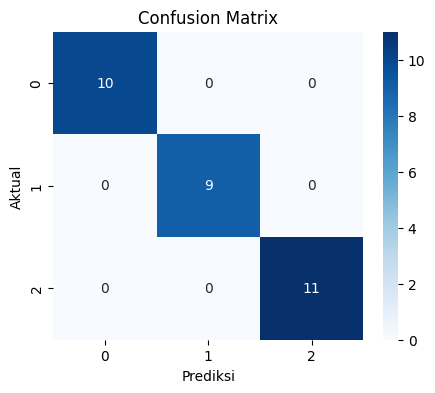

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_pred), yticklabels=set(y_test))
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

## Evaluasi dengan Classification Report

Selain Confusion Matrix, evaluasi model juga dilakukan menggunakan **Classification Report**.  
Laporan ini menampilkan metrik evaluasi utama untuk setiap kelas:  

- **Precision** → proporsi prediksi benar dari semua prediksi pada kelas tertentu.  
- **Recall** → proporsi prediksi benar dari semua data aktual pada kelas tersebut.  
- **F1-score** → harmonisasi antara precision dan recall.  
- **Support** → jumlah data aktual pada setiap kelas.  

Hasil classification report memberikan gambaran yang lebih detail mengenai performa model dalam mengenali masing-masing kelas bunga *Iris*.  
Dengan informasi ini, dapat diketahui apakah model bekerja seimbang pada semua kelas atau masih cenderung bias pada kelas tertentu.


In [35]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Penutup

Sebagai penutup, saya mengucapkan terima kasih kepada **Bapak Aldinata** dan **Ibu Dini** selaku dosen pembimbing mata kuliah *Machine Learning* yang telah memberikan arahan serta ilmu pengetahuan sehingga tugas ini dapat diselesaikan dengan baik.  

Melalui penyusunan dan penyelesaian tugas ini, saya juga berharap dapat semakin memahami konsep dasar **K-Nearest Neighbors (KNN)** serta langkah-langkah praktis dalam penerapannya.  
Pemahaman ini diharapkan menjadi bekal untuk mempelajari algoritma machine learning lainnya secara lebih mendalam di masa mendatang.
